In [269]:
# pip install catboost

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.svm import SVC
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

EXPLORATORY DATA ANALYSIS

In [271]:
df = pd.read_csv('Processed_RUSSELL.csv')

In [272]:
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,DJI,HSI,IXIC,SSEC,S&P,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,RUT,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,640.099976,0.921723,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.014951,NaN,0.017306,NaN,0.016043,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,RUT,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,638.489990,-0.375903,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,-0.001128,0.020909,0.000126,0.011844,0.003116,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,RUT,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,637.950012,0.996234,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000157,0.006153,-0.003300,-0.008520,0.000546,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,RUT,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,641.969971,0.059932,0.006301,-0.000846,-0.002515,0.023521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.003138,-0.006567,-0.000452,-0.018880,0.004001,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,RUT,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [273]:
df.dtypes

,0
Date,object
Close,float64
Volume,float64
mom,float64
mom1,float64
...,...
Dollar index-F,float64
Dollar index,float64
wheat-F,float64
XAG,float64


In [274]:
df.shape

(1984, 84)

In [275]:
df.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,DJI,HSI,IXIC,SSEC,S&P,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1983.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,1975.000000,1965.000000,1935.000000,1785.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1984.000000,1984.000000,1506.000000,1505.000000,1501.000000,1505.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1944.000000,1913.000000,1917.000000,1983.000000,1814.000000,1983.000000,1746.000000,1983.000000,1983.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1983.000000,1984.00000,1984.000000,1980.000000,1984.000000,1984.000000,1980.000000,1984.000000,1984.000000,1978.000000,1984.000000,1909.000000,1905.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,1018.599466,0.020292,0.000511,0.000513,0.000515,0.000515,0.248217,0.489019,0.741984,0.999259,1018.414150,1018.219404,1017.736413,1017.066303,0.160660,0.190781,0.261265,1.454607,2.357228,-0.000453,-0.020158,4.098523,5.071033,-0.000019,0.000283,0.000016,-0.000028,0.000999,0.001266,0.000188,0.000426,0.000568,0.000604,0.000468,0.000155,0.000207,0.000194,0.000486,0.000443,0.000226,0.000603,-0.000005,0.000464,0.000316,2.196568,2.166447,2.095963,0.030121,0.100605,0.972510,2.713805,4.809768,4.880252,4.910373,-0.001673,-0.006113,-0.007198,-0.00557,0.015257,0.020717,-0.000141,0.004945,0.039303,0.042334,-0.006174,0.016603,0.022208,0.022666,0.021816,0.062853,0.005222,0.044279,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,243.220270,0.234049,0.012767,0.012769,0.012772,0.012775,2.685003,3.530575,4.347954,4.893268,241.501555,239.575368,234.198482,210.634397,0.245119,0.272557,0.298717,0.485540,0.603573,0.030872,0.141000,0.637084,0.708687,0.005473,0.006300,0.005235,0.001858,0.016017,0.019738,0.013668,0.008728,0.016494,0.014091,0.015553,0.011574,0.013145,0.009689,0.012619,0.008681,0.011606,0.010564,0.014315,0.009335,0.009772,0.665357,0.677706,0.695124,0.046693,0.083104,0.260059,0.459884,0.845493,0.832982,0.817915,0.143203,0.101676,0.093435,0.71068,1.920643,1.307374,1.415230,2.070563,1.229589,0.859720,0.598391,0.955724,1.317282,1.190320,1.025523,1.042482,2.730898,1.347234,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,586.489990,-0.830978,-0.089095,-0.089095,-0.089095,-0.089095,-17.896192,-21.703151,-20.680251,-22.584400,601.084230,612.036534,630.026731,654.039748,-0.030000,-0.020000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-0.027657,-0.031467,-0.018905,-0.011837,-0.123558,-0.126568,-0.071742,-0.032696,-0.094149,-0.113995,-0.090440,-0.061882,-0.080425,-0.046673,-0.068233,-0.055464,-0.066010,-0.068994,-0.084909,-0.066634,-0.070507,0.000000,0.000000,0.000000,-0.270000,-0.190000,0.000000,-2.400000,-1.340000,-1.210000,-1.030000,-1.000000,-1.000000,-1.000000,-3.79000,-8.570000,-8.080000,-7.250000,-8.670000,-6.630000,-5.930000,-2.620000,-4.830000,-9.350000,-7.390000,-6.180000,-6.810000,-11.250000,-8.670000,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,799.520019,-0.085167,-0.005690,-0.005693,-0.005696,-0.005699,-1.247495,-1.564681,-1.793903,-1.992222,802.044839,804.023959,800.119044,783.633559,0.020000,0.030000,0.080000,1.110000,1.940000,-

df.describe() gives a statistical summary of our dataframe.  We can easily;

1. Understand the central tendency (mean, median).

2. See the spread of the data (standard deviation, min, max).

3. Identify potential outliers using the 25%, 50%, and 75% percentiles.

4. Get a quick overview of the dataset's distribution and scale.

For example, some columns like 'close' , 'EMA_10',	'EMA_20',	'EMA_50',	'EMA_200' have very high standard deviations which mean data points are widely spread out from their means.


In [276]:
df.isnull().sum().sort_values(ascending=False)


,0
CAD,483
JPY,479
CNY,479
GBP,478
SSEC,238
...,...
S&P-F,0
Dollar index-F,0
Dollar index,0
XAG,0


In [277]:
df_clean = df.dropna()

In [278]:
df.shape, df_clean.shape

((1984, 84), (1114, 84))

I chose to drop null values because the dropped rows had too many missing values and may hurt more model performance than help, also, the remaining data is large and representative

In [279]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 201 to 1923
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1114 non-null   object 
 1   Close           1114 non-null   float64
 2   Volume          1114 non-null   float64
 3   mom             1114 non-null   float64
 4   mom1            1114 non-null   float64
 5   mom2            1114 non-null   float64
 6   mom3            1114 non-null   float64
 7   ROC_5           1114 non-null   float64
 8   ROC_10          1114 non-null   float64
 9   ROC_15          1114 non-null   float64
 10  ROC_20          1114 non-null   float64
 11  EMA_10          1114 non-null   float64
 12  EMA_20          1114 non-null   float64
 13  EMA_50          1114 non-null   float64
 14  EMA_200         1114 non-null   float64
 15  DTB4WK          1114 non-null   float64
 16  DTB3            1114 non-null   float64
 17  DTB6            1114 non-null   floa

In [280]:
df_clean.drop(['Name'] ,inplace=True, axis=1)

# drop the unique identifier ['Name'] because they don’t help find generalizable patterns.

In [281]:
df_clean['Date']

,Date
201,2010-10-19
202,2010-10-20
203,2010-10-21
206,2010-10-26
207,2010-10-27
...,...
1914,2017-08-09
1915,2017-08-10
1919,2017-08-16
1920,2017-08-17


In [282]:

# Convert the 'Date' column to datetime to extract more info
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

In [283]:
# Extract time-based features to improve analysis or model performance.



# Extract features directly from the column
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Year'] = df_clean['Date'].dt.year

In [284]:
df_clean[['Date','Day','Month','Year']]


,Date,Day,Month,Year
201,2010-10-19,19,10,2010
202,2010-10-20,20,10,2010
203,2010-10-21,21,10,2010
206,2010-10-26,26,10,2010
207,2010-10-27,27,10,2010
...,...,...,...,...
1914,2017-08-09,9,8,2017
1915,2017-08-10,10,8,2017
1919,2017-08-16,16,8,2017
1920,2017-08-17,17,8,2017


In [285]:
# drop the Date column since we've extracted the info we need
df_clean.drop(columns='Date', inplace = True)

Visualization

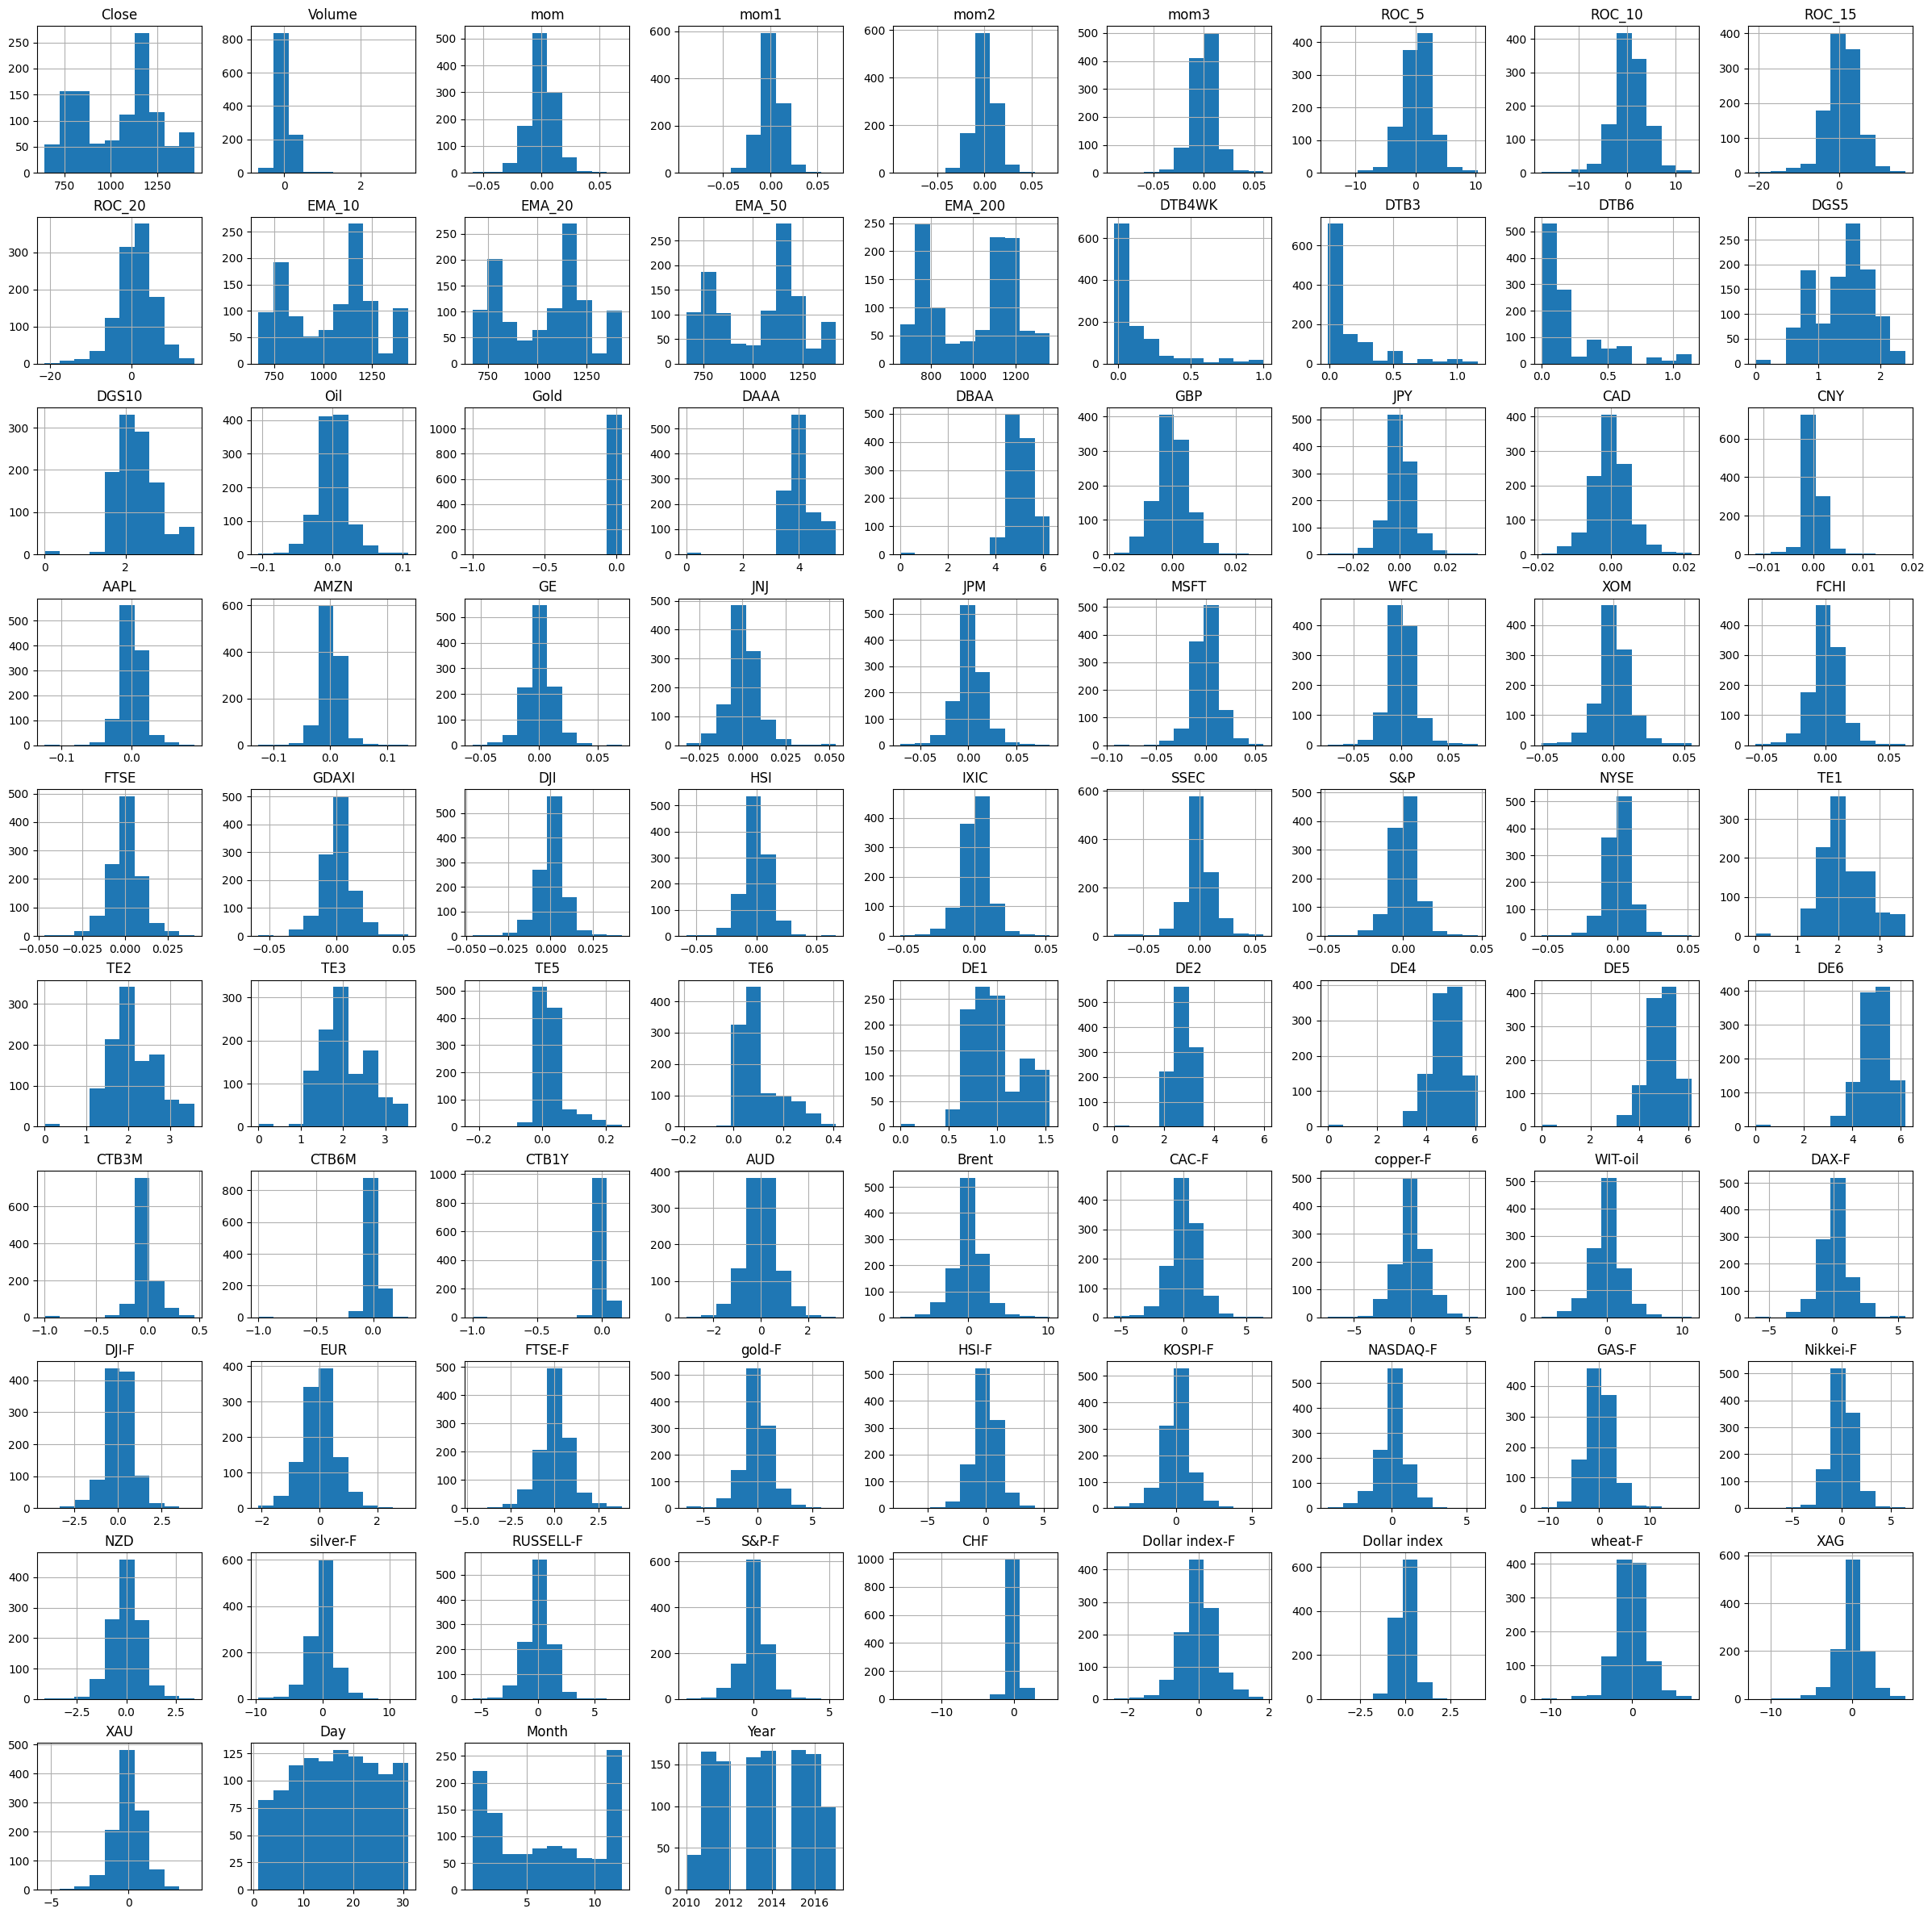

In [286]:
import matplotlib.pyplot as plt
df_clean.hist(figsize=(30,30))
plt.show()

Feature Selection

In [287]:
# Independent Features  (all columns except 'Close')
X = df_clean.drop(columns=['Close'])

# Target variable (the 'Close' price)
y = df_clean['Close']

In [288]:
model = CatBoostRegressor(verbose=0)
model.fit(X, y)

In [289]:
feature_importance = model.get_feature_importance()
feature_names = X.columns


feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort and display top features
top = feat_df.sort_values(by='Importance', ascending=False).head(20)
print(top)

    Feature  Importance
10   EMA_20   25.945589
12  EMA_200   24.874012
9    EMA_10   17.594313
11   EMA_50    8.922310
83     Year    6.961680
14     DTB3    3.029752
15     DTB6    1.891884
49      DE2    1.571281
16     DGS5    1.259726
82    Month    0.723113
43      TE1    0.702978
48      DE1    0.566334
13   DTB4WK    0.505286
50      DE4    0.461489
52      DE6    0.441055
7    ROC_15    0.426326
6    ROC_10    0.358258
8    ROC_20    0.286228
51      DE5    0.247207
20     DAAA    0.247165


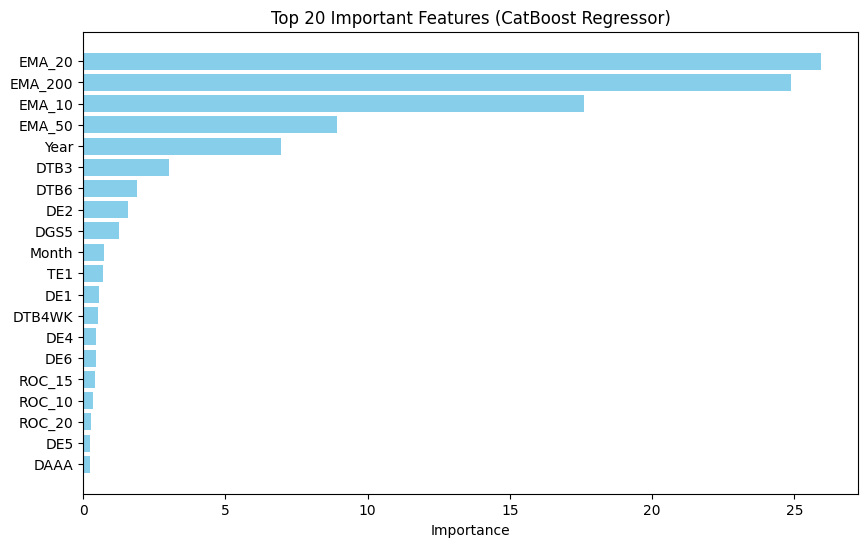

In [290]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top['Feature'], top['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 20 Important Features (CatBoost Regressor)")
plt.gca().invert_yaxis()
plt.show()


Selected top 20 features to;

1. Reduce overfitting:
Fewer features means the model focuses on the most relevant data, lowering the risk of overfitting.

2. Simplifie interpretation:
Models with fewer features are easier to understand and explain.

3. Remove noise and redundant features:
Features with low importance may add noise or duplicate information, harming performance.

In [291]:
selected_features = top["Feature"].tolist()

In [292]:
X_selected = df_clean[selected_features]

In [293]:
X_selected.head()

,EMA_20,EMA_200,EMA_10,EMA_50,Year,DTB3,DTB6,DE2,DGS5,Month,TE1,DE1,DTB4WK,DE4,DE6,ROC_15,ROC_10,ROC_20,DE5,DAAA
201,685.126077,654.991414,696.191910,664.903707,2010,0.14,0.18,3.25,1.11,10,2.36,1.05,0.14,5.57,5.61,2.771572,0.696315,4.436863,5.61,4.70
202,686.743592,655.460255,697.267923,666.362777,2010,0.14,0.17,3.23,1.11,10,2.37,1.05,0.14,5.57,5.60,3.611057,2.448451,6.913244,5.60,4.69
203,687.827059,655.884730,697.422846,667.608158,2010,0.13,0.18,3.20,1.15,10,2.44,1.06,0.13,5.59,5.64,3.250803,2.030021,7.595088,5.64,4.71
206,692.591593,657.368679,701.439665,671.964683,2010,0.14,0.18,3.13,1.27,10,2.53,1.02,0.14,5.62,5.66,2.550231,1.564567,4.663696,5.66,4.78
207,693.700011,657.834961,701.946995,673.229988,2010,0.14,0.18,3.09,1.34,10,2.61,1.04,0.14,5.66,5.70,2.757790,-0.317068,3.923907,5.70,4.80


In [294]:
X_selected.shape, y.shape

((1114, 20), (1114,))

In [295]:
# created train and test data with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=False)

In [296]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define model
model = CatBoostRegressor(verbose=0, depth=2, iterations=600, l2_leaf_reg= 2, random_seed = 42, learning_rate =.3)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


MSE: 5105.225102683834
MAE: 53.40233921399981
R² Score: 0.6828056076848812


Model Pickling

In [297]:
import pickle

# Save the model to a file
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)
